# Initialize the graph 
Load the graph from Chembl27_csv graph located in the google storage
## Graph Requirements
+ Graph should have label support
+  

In [ ]:
import os                                                                        
import time                                                                      
import json

from katana import remote
from katana.remote import import_data
from katana_enterprise import async_to_sync

os.environ["KATANA_SERVER_ADDRESS"] = "localhost:8080"
#os.environ["KATANA_SERVER_ADDRESS"] = "host.docker.internal:8080"

num_partitions = 4

#client = remote.Client(disable_version_check=True)
client = remote.Client()

In [2]:
import katana
print(katana.__version__) 

0.1.101.dev+6.22.1d6a0f.15d017.unmerged


## Loading the graph

In [ ]:
%%time
chembl27_csv_new = client.create_graph(num_partitions=num_partitions)

print(f"Importing graph from CSV files into graph {chembl27_csv_new} ...")
import_data.csv(
    chembl27_csv_new,
    input_node_path="gs://katana-demo-datasets/csv-datasets/chembl_raw/mapping/node_list_gcp.txt",
    input_edge_path="gs://katana-demo-datasets/csv-datasets/chembl_raw/mapping/edge_list_gcp.txt",
    input_dir="gs://katana-demo-datasets/csv-datasets/chembl_raw/csv/chembl27/",
    #have_headers=True,
    files_have_headers=True,
    data_delimiter="|",
    schema_delimiter="|",
    partition_policy="random-oec"
)

In [26]:
#%%time
#chembl27_csv_new = remote.Client().create_graph(num_partitions=1)
#gs://katana-demo-datasets/rdkit_test_small
#import_data.rdg(chembl27_csv_new, f"gs://katana-demo-datasets/chembl_from_csv/chembl27_csv_new")
#import_data.rdg(chembl27_csv_new, f"gs://katana-demo-datasets/rdkit_test_small")

          0/? [?op/s]

CPU times: user 132 ms, sys: 5.46 ms, total: 137 ms
Wall time: 41.9 s


In [4]:
%%time
#query6='''match ()-[e]-() return count(e);'''
#query6='''match (e) return count(e);'''
#query6='''match (b:molecule_dictionary)<-[:has_molecule]-(l:activities)-[:has_assay]->(r:assays)-[:has_target]->(t:target_dictionary{target_type:'SINGLE PROTEIN'}) return count(b)'''
query6='''match (t:target_dictionary) return t.target_type, count(t) order by t.target_type'''
smile6= chembl27_csv_new.query(query6)
print(list(smile6))

          0/? [?op/s]

[{'count(t)': 1, 't.target_type': 'ADMET'}, {'count(t)': 1725, 't.target_type': 'CELL-LINE'}, {'count(t)': 14, 't.target_type': 'CHIMERIC PROTEIN'}, {'count(t)': 7, 't.target_type': 'LIPID'}, {'count(t)': 12, 't.target_type': 'MACROMOLECULE'}, {'count(t)': 9, 't.target_type': 'METAL'}, {'count(t)': 1, 't.target_type': 'NO TARGET'}, {'count(t)': 1, 't.target_type': 'NON-MOLECULAR'}, {'count(t)': 38, 't.target_type': 'NUCLEIC-ACID'}, {'count(t)': 10, 't.target_type': 'OLIGOSACCHARIDE'}, {'count(t)': 2199, 't.target_type': 'ORGANISM'}, {'count(t)': 2, 't.target_type': 'PHENOTYPE'}, {'count(t)': 483, 't.target_type': 'PROTEIN COMPLEX'}, {'count(t)': 53, 't.target_type': 'PROTEIN COMPLEX GROUP'}, {'count(t)': 345, 't.target_type': 'PROTEIN FAMILY'}, {'count(t)': 7, 't.target_type': 'PROTEIN NUCLEIC-ACID COMPLEX'}, {'count(t)': 124, 't.target_type': 'PROTEIN-PROTEIN INTERACTION'}, {'count(t)': 101, 't.target_type': 'SELECTIVITY GROUP'}, {'count(t)': 7933, 't.target_type': 'SINGLE PROTEIN'}, 

## Query6

In [4]:
%%time
query6='''match (b:molecule_dictionary)-[:has_molecule]-(l:activities)-[:has_assay]-(r:assays)-[:has_target]-(t:target_dictionary{target_type:'SINGLE PROTEIN'}) return count(b)'''
#query6='''match (b:molecule_dictionary)<-[:has_molecule]-(l:activities)-[:has_assay]->(r:assays)-[:has_target]->(t:target_dictionary{target_type:'SINGLE PROTEIN'}) return count(b)'''
smile6= chembl27_csv_new.query(query6)
print(smile6[0])

          0/? [?op/s]

{'count(b)': 6408534}
CPU times: user 241 ms, sys: 28.3 ms, total: 269 ms
Wall time: 23 s


## Query7

In [7]:
 %%time
query7='''match (b:molecule_dictionary)<-[:has_molecule]-(l:activities)-[:has_assay]->(r:assays)-[:has_target]->(t:target_dictionary{target_type:'SINGLE PROTEIN', organism:'Mycobacterium tuberculosis'})  return count(b);'''

smile7= chembl27_csv_new.query(query7)
print(smile7[0])

          0/? [?op/s]

{'count(b)': 12728}
CPU times: user 228 ms, sys: 22.5 ms, total: 250 ms
Wall time: 8.56 s


## Query8

In [9]:
%%time
query8='''match (b:molecule_dictionary{chembl_id:'CHEMBL941'})<-[:has_molecule]-(l:activities)-[:has_assay]->(r:assays)-[:has_target]->(t:target_dictionary)<-[:has_target]-(c:target_components) return count(b);'''

smile8= chembl27_csv_new.query(query8)
print(smile8[0])

          0/? [?op/s]

{'count(b)': 2155}
CPU times: user 283 ms, sys: 16.1 ms, total: 299 ms
Wall time: 11.1 s


## Query9

In [18]:
%%time
query9='''match (b:molecule_dictionary)<-[:has_molecule]-(l:activities)-[:has_assay]->(r:assays)-[:has_target]->(t:target_dictionary{chembl_id_td:"CHEMBL1827"}) return count(b);'''
#query9='''match (t:target_dictionary) return (t) limit 1;'''
smile9= chembl27_csv_new.query(query9)
print(smile9[0])

          0/? [?op/s]

{'count(b)': 4644}
CPU times: user 184 ms, sys: 0 ns, total: 184 ms
Wall time: 17.3 s


## Query 10

In [20]:
%%time
query10 = '''match (f:compound_properties)-[:has_molecule]-(b:molecule_dictionary{oral:1})<-[:has_molecule]-(d:drug_indication{mesh_id:'D006333'}), (b)<-[:has_molecule]-(l:activities)-[:has_assay]->
(r:assays)-[:has_target]->(t:target_dictionary)<-[:has_target]-(c:target_components)-[:has_comp_seq]->(o:component_sequences) where l.pchembl_value > 5.0 and f.full_mwt >= 199.0 return count(b);'''
smile10  = chembl27_csv_new.query(query10)
print(smile10[0])

          0/? [?op/s]

{'count(b)': 4444}
CPU times: user 265 ms, sys: 0 ns, total: 265 ms
Wall time: 20.8 s


## Query 11

In [45]:
%%time
query11 = ''' match (f:compound_properties)-[:has_molecule]-(b:molecule_dictionary{oral:1})-
[:has_molecule]-(d:drug_indication{mesh_id:'D006333'}), (b)-[:has_molecule]-(l:activities)-[:has_assay]-
(r:assays)-[:has_target]-(t:target_dictionary)-[:has_target]-(c:target_components)-[:has_comp_seq]-(o:component_sequences),
(b)-[has_molecule]-(cc:compound_structures) where  l.pchembl_value > 5.0 and f.full_mwt >= 199 return b.molregno,count(t) as targets order by targets DESC limit 10'''

smile11  = chembl27_csv_new.query(query11)
print(smile11[0])

          0/? [?op/s]

{'b.molregno': None, 'targets': 4444}
CPU times: user 472 ms, sys: 32.7 ms, total: 505 ms
Wall time: 14.6 s


## Query12

In [5]:
%%time
query12 = '''match (f:compound_properties)-[:has_molecule]-(b:molecule_dictionary{oral:1})-[:has_molecule]-(d:drug_indication{mesh_id:'D006333'}),
(b)-[:has_molecule]-(l:activities)-[:has_assay]-(r:assays)-[:has_target]-(t:target_dictionary)-[:has_target]-(c:target_components)-[:has_comp_seq]-(o:component_sequences),
(b)-[has_molecule]-(cc:compound_structures) where  l.pchembl_value > 5.0 and f.full_mwt >= 199   
with distinct cc order by rdk_tanimoto_similarity(cc.canonical_smiles, 'c1ccccc1') 
match  (cc)-[:has_molecule]-(b:molecule_dictionary)-[:has_molecule]-(l:activities)-[:has_assay]-(r:assays)-[:has_target]-(t:target_dictionary)  
return cc.canonical_smiles, t.chembl_id_td order by cc.molregno_cs;'''
smile12  = chembl27_csv_new.query(query12)
print(smile12[10])

          0/? [?op/s]

{'cc.canonical_smiles': 'C=C1CC[C@H](O)C/C1=C/C=C1\\CCC[C@@]2(C)[C@H]1CC[C@@H]2[C@H](C)/C=C/[C@H](C)C(C)C', 't.chembl_id_td': 'CHEMBL3392921'}
CPU times: user 451 ms, sys: 71.4 ms, total: 522 ms
Wall time: 30 s


## Extracting some SMILES strings

In [5]:
#query13 = '''match (f:compound_properties)-[:has_molecule]-(b:molecule_dictionary{oral:'1'})-[:has_molecule]-(d:drug_indication{mesh_id:'D006333'}), (b)-[:has_molecule]-(l:activities)-[:has_assay]-(r:assays)-[:has_target]-(t:target_dictionary)-[:has_target]-(c:target_components)-[:has_comp_seq]-(o:component_sequences),(b)-[has_molecule]-(cc:compound_structures) where l.pchembl_value > '5' and f.full_mwt >= '199' with distinct cc order by tanimoto_similarity(cc.canonical_smiles, 'c1ccccc1') DESC limit 10'''
#with distinct cc order by tanimoto_similarity(cc.canonical_smiles, 'c1ccccc1') DESC limit 10 match (cc)-[:has_molecule]-(b:molecule_dictionary)-[:has_molecule]-(l:activities)-[:has_assay]-(r:assays)-[:has_target]-(t:target_dictionary) return cc.molregno, t.chembl_id order by cc.molregno;


#smiles = graph13.query("match (b:molecule_dictionary{oral:1})-[has_molecule]-(cc:compound_structures) \
#                      RETURN cc.canonical_smiles limit 5")
#smiles = graph13.query("match (cc:compound_structures) RETURN cc.canonical_smiles limit 5")
#smiles = graph13.query("match (b:molecule_dictionary) RETURN b limit 1")
query13='''match (a:compound_structures) with a LIMIT 100 return a.canonical_smiles'''
smiles = chembl27_csv_new.query(query13)


          0/? [?op/s]

In [14]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import rdFMCS
from tqdm import tqdm
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.ipython_useSVG = True

#df_approved_smiles = pd.DataFrame(l_approved_smiles)
#print(df_approved_smiles["canonical_smiles"].head(5))
#Chem.MolFromSmiles(smiles[99])

CCN(CC)C(C)(C)CCCC[C@H]1CC[C@H](N(C)S(=O)(=O)c2ccc(C(F)(F)F)cc2)CC1


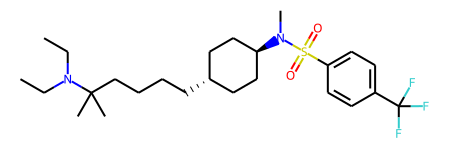

In [27]:
l_approved_smiles=[]
for item in smiles:
   l_approved_smiles.append(item)
df_approved_smiles = pd.DataFrame(l_approved_smiles)

df_approved_smiles.columns = ['smiles']
df_approved_smiles.columns
print(df_approved_smiles.iloc[1, 0])
Chem.MolFromSmiles(df_approved_smiles.iloc[1, 0])

# FingerPrints
### rdk_fingerprint -- takes a list smiles strings
* Ran fingerprints for upto 100000 strings. Client started failing somewhere after 100k strings

In [5]:
#smiles = graph13.query("match (a:compound_structures) RETURN rdk_fingerprint(a.canonical_smiles) LIMIT 10")
query13 = '''MATCH (cc:compound_structures) WITH cc LIMIT 100000 RETURN rdk_fingerprint(cc.canonical_smiles)'''
#query13 = '''MATCH (cc:compound_structures) LIMIT 1 WITH cc  RETURN morgan_fingerprint(cc.canonical_smiles)'''
smiles = chembl27_csv_new.query(query13)
print(smiles[0])

          0/? [?op/s]

{'rdk_fingerprint(cc.canonical_smiles)': '1100111111000010110010101101100011000010011101000110101011100100111010111110110011011101001011001001010110000100101000101011001000000101101011000001111111011000010100101010011010011001111110110011011010100100100001011000000101010100010100111001110001111010111100111000100000101000100110000010001011101001101110111101010111110000001011101101111010110001001011110000000111001000000011110000101001011000010000010010111101101110000010100111011111001110010000010001011011100011000110000000001000111101010110000010110011000100011011011001010110011010010011001001011011110110110001001000100100101011100010111011000111101001100010100000111111100111010000011110011110001100011001111000010001011101110101110011000110010110000110010011001100100111100010101001101000111010101111111001001000000110000100101000100000110011101010010010100111101111101001111110100101100111001011110111000101010010010011100000101100110101101011100001010001111001101000000101111000100000111001

# FingerPrints
### morgan_fingerprint -- takes a list smiles strings.


In [7]:
#smiles = graph13.query("match (a:compound_structures) RETURN rdk_fingerprint(a.canonical_smiles) LIMIT 10")
#query13 = '''MATCH (cc:compound_structures) WITH cc LIMIT 100 RETURN rdk_fingerprint(cc.canonical_smiles)'''
query13_Mfpt = '''Match (cc:compound_structures) WHERE cc.canonical_smiles IS NOT NULL AND cc.canonical_smiles <> 'None' WITH cc LIMIT 10 RETURN morgan_fingerprint(cc.canonical_smiles)'''
smiles13_Mfpt = chembl27_csv_new.query(query13_Mfpt)
print(smiles13_Mfpt[0])

          0/? [?op/s]

{'morgan_fingerprint(cc.canonical_smiles)': '0000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

# Tanimoto Similarity on smiles string

In [9]:
%%time
#smiles = graph13.query("match (cc:compound_structures) RETURN cc.canonical_smiles order by tanimoto_similarity(cc.canonical_smiles, 'c1ccccc1') DESC limit 10")
##query13 = '''MATCH (cc:compound_structures)  return cc.canonical_smiles, rdk_tanimoto_similarity(cc.canonical_smiles, 'c1ccccc1') limit 19'''
#query13 = '''MATCH (cc:compound_structures) WITH cc LIMIT 1 return cc.canonical_smiles order by rdk_tanimoto_similarity(cc.canonical_smiles, 'c1ccccc1') DESC limit 1'''
#query13='''match (a:compound_structures) with a LIMIT 2 return a.canonical_smiles order by rdk_tanimoto_similarity(a.canonical_smiles, 'CCOC(=O)c1[nH]c2ccccc2c1CNNC(=O)c1ccncc1')'''
#query13_TSim='''MATCH(a:compound_structures) WITH distinct a order by rdk_tanimoto_similarity(a.canonical_smiles, 'Cc1ccccc1') return rdk_fingerprint(a.canonical_smiles)'''
#query13_TSim='''MATCH(a:compound_structures) with a LIMIT 2 return a.canonical_smiles order by rdk_tanimoto_similarity(a.canonical_smiles, 'Cc1ccccc1') '''
#query13_TSim='''MATCH(a:compound_structures) LIMIT 2 with a return rdk_fingerprint(a.canonical_smiles) order by rdk_tanimoto_similarity(a.canonical_smiles, 'Cc1ccccc1')'''
query13_TSim= """MATCH (a:compound_structures) WHERE a.canonical_smiles <> 'None' and a.canonical_smiles IS NOT NULL RETURN a.canonical_smiles ORDER BY rdk_tanimoto_similarity(a.canonical_smiles, 'c1ccccc1-c2ccccc2') LIMIT 10"""
smiles13_TSim = chembl27_csv_new.query(query13_TSim)
print(smiles13_TSim[0])

          0/? [?op/s]

{'a.canonical_smiles': 'CC(C)N'}
CPU times: user 539 ms, sys: 71.7 ms, total: 611 ms
Wall time: 3min 18s


# SubStructure Similarity

In [24]:
#build_query = '''match (a:compound_structures) WHERE a.canonical_smiles <> 'None' and a.canonical_smiles IS NOT NULL with a   return rdk_get_substruct_matches(a.canonical_smiles,'CCOC(=O)c1[nH]c2ccccc2c1CNNC(=O)c1ccncc1',rdk_fingerprint(a.canonical_smiles,true))'''
#search_query = "return rdk_search_substructure_index('CCOC(=O)c1[nH]c2ccccc2c1CNNC(=O)c1ccncc1')"
#chembl27_csv.query(build_query)
#result = chembl27_csv_new.query(search_query)
#print(result[0])

# First build the index
build_query = '''MATCH (a) where a.smiles IS NOT NULL and a.smiles <> "None" RETURN rdk_build_substructure_index(a.smiles);'''
# Now query it
search_query = '''RETURN rdk_search_substructure_index('c1ccccc1-c2ccccc2')'''
chembl27_csv_new.query(build_query)
result = chembl27_csv_new.query(search_query)
print(result[0])

          0/? [?op/s]

          0/? [?op/s]

{"rdk_search_substructure_index('c1ccccc1-c2ccccc2')": []}


In [25]:
build_query = '''MATCH (a) where a.smiles IS NOT NULL and a.smiles <> "None" RETURN a.smiles;'''
result = chembl27_csv_new.query(build_query)
print(result[0])

          0/? [?op/s]

{'a.smiles': 'O=C(c1cc(-c2cc3c(cc2C(=O)N2Cc4ccccc4C[C@H]2CN2CCOCC2)OCO3)n2c1CCCC2)N(c1ccc(O)cc1)c1ccc(Cl)cc1'}


# SubStructure Search
### LSH Search -- requires smiles strings and their fingerprints. 

In [28]:
%%time
fingerprint_query = "MATCH (cc:compound_structures) WHERE cc.canonical_smiles IS NOT NULL AND cc.canonical_smiles <> 'None' WITH cc  RETURN rdk_fingerprint(cc.canonical_smiles)"
build_index_query = "return rdk_build_lsh(4, 25)"
#lsh_search_query = "return rdk_sim_lsh('O=C(Oc1ccccc1C(=O)O)C', .8, .00001)" #Aspirin
lsh_search_query = "return rdk_sim_lsh('Cc1ccc2c(Nc3cccc(c3)C(F)(F)F)noc2c1C#Cc1cnc2cccnn12',.8,.1)"
#lsh_search_query = "return rdk_sim_lsh('O=C(Oc1ccccc1C(=O)O)C',.8,.00001)"
chembl27_csv_new.query(fingerprint_query)
chembl27_csv_new.query(build_index_query)
result=chembl27_csv_new.query(lsh_search_query)
print(result[0])

          0/? [?op/s]

          0/? [?op/s]

          0/? [?op/s]

{"rdk_sim_lsh('Cc1ccc2c(Nc3cccc(c3)C(F)(F)F)noc2c1C#Cc1cnc2cccnn12',.8,.1)": []}
CPU times: user 19.6 s, sys: 20.9 s, total: 40.4 s
Wall time: 18min 27s


In [29]:
lsh_search_query = "return rdk_sim_lsh('O=C(Oc1ccccc1C(=O)O)C', .8, .00001)" #Aspirin
result=chembl27_csv_new.query(lsh_search_query)
print(result[0])

          0/? [?op/s]

{"rdk_sim_lsh('O=C(Oc1ccccc1C(=O)O)C', .8, .00001)": ['C=CC(=O)Oc1ccccc1C(=O)OC', 'CC(=O)Oc1ccc(C(=O)O)c(OC(C)=O)c1', 'CC(=O)Oc1ccccc1C(=O)O.NCCCC[C@H](N)C(=O)O', 'CC(=O)Oc1ccccc1C(=O)O.CC(=O)Oc1ccccc1C(=O)O.NC(N)=O', 'CCOc1ccccc1C(=O)O', 'CC(=O)Oc1ccccc1C(=O)O.NCCCCC(N)C(=O)O', 'CCCCC(=O)Oc1ccccc1C(=O)O', 'CC(=O)Oc1ccccc1C(=O)[O-].CC(=O)Oc1ccccc1C(=O)[O-].NC(N)=O.[Ca+2]', 'COC(=O)c1ccccc1OC(C)=O', 'O=C(CBr)Oc1ccccc1C(=O)O', 'CC(=O)Oc1c(C)cccc1C(=O)O', 'O=C(/C=C/C(=O)Oc1ccccc1C(=O)O)Oc1ccccc1C(=O)O', 'O=C(CCC(=O)Oc1ccccc1C(=O)O)Oc1ccccc1C(=O)O', 'CC(=O)Oc1ccccc1C(=O)O']}


In [31]:
##Indexed substructure search
build_query = "MATCH (cc:compound_structures) WHERE cc.canonical_smiles IS NOT NULL AND cc.canonical_smiles <> 'None' WITH cc  RETURN rdk_build_substructure_index(cc.canonical_smiles)"
search_query = "return rdk_search_substructure_index('Cc1ccc2c(Nc3cccc(c3)C(F)(F)F)noc2c1C#Cc1cnc2cccnn12')" 
chembl27_csv_new.query(build_query)
result = chembl27_csv_new.query(search_query)
print(result[0])

          0/? [?op/s]

          0/? [?op/s]

{"rdk_search_substructure_index('Cc1ccc2c(Nc3cccc(c3)C(F)(F)F)noc2c1C#Cc1cnc2cccnn12')": []}


In [35]:
#query = '''match (a) with a.smiles as b return b,rdk_get_substruct_matches(b, 'Cc1ccc2c(Nc3cccc(c3)C(F)(F)F)noc2c2C#Cc1cnc2cccnn12', rdk_fingerprint(b))'''
query =  '''match (a:compound_structures) with a.canonical_smiles as b return b,rdk_get_substruct_matches(b,'Cc1ccc2c(Nc3cccc(c3)C(F)(F)F)noc2c2C#Cc1cnc2cccnn12',rdk_fingerprint(b))'''
result = chembl27_csv_new.query(query)
print(list(result))

          0/? [?op/s]

URLError: <urlopen error [Errno 111] Connection refused>

          0/? [?op/s]

,ChEMBL_ID,SMILES,fp,tan_sim,Mol
0,CHEMBL2105708,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,1100111011110111100110100011110110100101011010...,0.606250,
1,CHEMBL1171837,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,1100111011110111100110100011110110100101011010...,0.606250,
2,CHEMBL501867,CC[C@]1(O)C[C@H]2CN(CCc3c([nH]c4ccccc34)[C@@](...,1111111111111111111111111111011111111111111111...,0.584080,
3,CHEMBL90555,CC[C@]1(O)C[C@H]2CN(CCc3c([nH]c4ccccc34)[C@@](...,1111111111111111111111111111011111111111111111...,0.583582,
4,CHEMBL378544,CC[C@]1(O)C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@]...,1111111111111111111111111111011111111111111111...,0.583458,

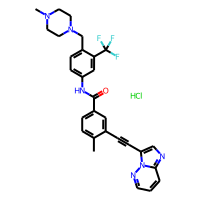
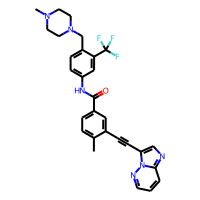
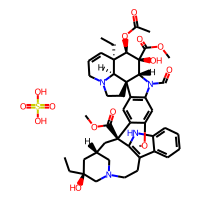
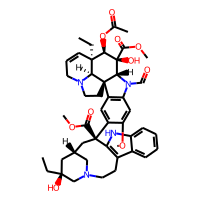
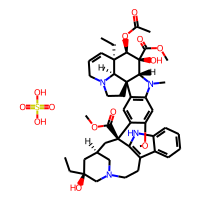

In [34]:
q_approved_small_mols='''MATCH (cc:compound_structures)-[:has_molecule]-(b:molecule_dictionary{max_phase:4, molecule_type:'Small molecule'}) WHERE cc.canonical_smiles <> 'None' and cc.canonical_smiles IS NOT NULL  return b.chembl_id, cc.canonical_smiles, rdk_fingerprint(cc.canonical_smiles), rdk_tanimoto_similarity(cc.canonical_smiles, 'Cc1ccc2c(Nc3cccc(c3)C(F)(F)F)noc2c1C#Cc1cnc2cccnn12') ORDER BY  rdk_tanimoto_similarity(cc.canonical_smiles,'Cc1ccc2c(Nc3cccc(c3)C(F)(F)F)noc2c1C#Cc1cnc2cccnn12') DESC'''
approved_smiles= chembl27_csv_new.query(q_approved_small_mols)
#print(approved_smiles[0])
l_approved_smiles=[]
for item in approved_smiles:
   l_approved_smiles.append(item)

df_approved_smiles = pd.DataFrame(l_approved_smiles)

df_approved_smiles.columns = ['ChEMBL_ID','SMILES','fp','tan_sim']
PandasTools.AddMoleculeColumnToFrame(df_approved_smiles,'SMILES','Mol')
df_approved_smiles.head(5)

# Basic Support for RDKit Simsearch
In this notebook we run the basic RDKit simsearch implementation without advanced optimizations.
## Graph Requirements
+ Edges between nodes must contain property which holds the score which will guide the search 
+ Search will start from the requested nodes and will return the top k matches assuming the requested nodes have neighbors n > k. 

In [32]:
simsearch_query = f"""
MATCH (a)
WHERE a.chembl_id = 'CHEMBL941' or a.chembl_id = 'CHEMBL3545413'
WITH rdk_similarity_search(a,{NUM_SIMILAR_COMPOUNDS},{SCORE_KEY}) as r
RETURN r.chembl_id
"""

NameError: name 'NUM_SIMILAR_COMPOUNDS' is not defined